In [2]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np
import numpy.fft as fft
import os
from PIL import Image
from math import log10, sqrt

# 경로 설정

In [3]:
# image 경로
path = 'C:/Users/inbum/OneDrive - 충남대학교/workspace/sia/sia_inbum/raster_data/imageset'
file = os.listdir(path)

number_file = len(file)

## DataFrame 만들기

coulums = 이름,파일형식, 높이, 너비, 채널 수, size, RGB 제일많은 값, 히스토그램 모양분류,  SNR,MTF, alliasing, histogram properties

In [18]:
name_list = []
file_shape_list = []

def base_img(img_path):
    for i in range(number_file):
        file_shape = file[i].split('.')[-1]
        m = '.' + file_shape
        img_name = file[i].replace(m,'')
        name_list.append(img_name)
        file_shape_list.append(file_shape)

In [19]:
height_list = []
width_list = []
channel_num_list =[]
size_list = []
hsv_list = []
a= []

def shape_img(img_path):
    for i in range(number_file) : 
        img_num = file[i]
        img = path + '/' + img_num

        img_array = np.fromfile(img, np.uint8)
        image = cv2.imdecode(img_array,cv2.IMREAD_COLOR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


        height = image_rgb.shape[0]
        width = image_rgb.shape[1]
        channel = image_rgb.shape[2]
        size = image_rgb.size


        height_list.append(height)
        width_list.append(width)
        channel_num_list.append(channel)
        size_list.append(size)
        hsv_list.append(image_hsv)

rgb 값의 제일 큰 값과 rgb 값의  max

In [20]:
max_R = []
max_G = []
max_B = []
max_gray = []
max_rgb = []

def rgb_img(img_path):
    for i in range(number_file):

        img_num = file[i]
        img = path + '/' + img_num

        img_array = np.fromfile(img, np.uint8)
        image = cv2.imdecode(img_array,cv2.IMREAD_COLOR)
        image2 = cv2.imdecode(img_array,cv2.IMREAD_GRAYSCALE)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        chans = cv2.split(image_rgb)
        colors = ('r', 'g', 'b')
        features = []
        feature_data = ''
        counter = 0
        for (chan, color) in zip(chans, colors):
            counter = counter + 1

            hist = cv2.calcHist([chan], [0], None, [256], [0, 256])

            # find the peak pixel values for R, G, and B
            elem = np.argmax(hist)

            if counter == 1:
                red = elem
                max_R.append(red)
            elif counter == 2:
                green = elem
                max_G.append(green)
            elif counter == 3:
                blue = elem
                max_B.append(blue)
        r = max_R[i]
        g = max_G[i]
        b = max_B[i]
    
        # = 일때 예외도 넣어줘야 하지만 일단은 pass
        if r >=g and r>= b :
            max_rgb.append('R')
        elif g >=r and g>= b :
            max_rgb.append('G')
        else : 
            max_rgb.append('B')


        hist2 = cv2.calcHist([image2],[0],None,[256],[0,256])
        elem_2 = np.argmax(hist2)
        # elem_2 = str(elem_2)
        max_gray.append(elem_2)

In [21]:
snr_gray_list = []  #비율이 높을수록 신호 품질이 좋음.? signal-to-noise ratio
snr_list = []
snr_r_list = []
snr_g_list = []
snr_b_list = []

def snr_img(img_path):
    for i in range(number_file):
        img_num = file[i]
        img = path + '/' + img_num

        img_array = np.fromfile(img, np.uint8)
        image = cv2.imdecode(img_array,cv2.IMREAD_GRAYSCALE)
        image_2 = cv2.imdecode(img_array,cv2.IMREAD_COLOR)
        image_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
        red = cv2.split(image_rgb)[0]
        green = cv2.split(image_rgb)[1]
        blue = cv2.split(image_rgb)[2]

        list_k = [image,image_rgb,red,green,blue]

        for i in range(5):
            mean = np.mean(list_k[i])
            noise = list_k[i] - mean
            snr = mean / np.std(noise)
            if i == 0:
                snr_gray_list.append(snr)
            elif i == 1 : 
                snr_list.append(snr)
            elif i == 2 : 
                snr_r_list.append(snr)
            elif i == 3 : 
                snr_g_list.append(snr)
            else :
                snr_b_list.append(snr)


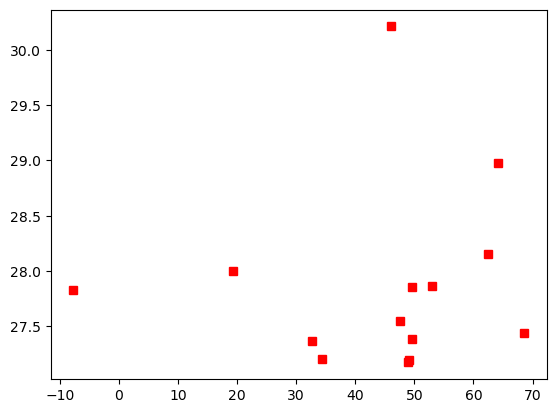

In [22]:
brisque_score_list = [19.293083121983926, 52.966342084646925, 49.64789771515629, 48.927402917199146, 49.580929876794784, 62.45168011588984, 46.11765673531633, 32.716500791860284, 64.10846407838349, 34.3312923234042, 47.58046866693425, 68.57829860277403, -7.7157626291594, 49.14760131067575]
list_d = [28.00280246809588, 27.862985680232978, 27.85120335208798, 27.172505733488475, 27.38147441615313, 28.156756808574382, 30.211907734399386, 27.370223253296633, 28.97752301438063, 27.206360211276525, 27.545944708815657, 27.434677524504107, 27.826440058862232, 27.195788992045618]
list_me = [4,3,]

plt.plot(brisque_score_list, list_d, 'rs')
# plt.plot(brisque_score_list)
#livsm 경로가 get_raster.ipynb와 같은 폴더에 있어야함.

In [23]:
base_img(path)
shape_img(path)
rgb_img(path)
snr_img(path)

In [28]:
df = pd.DataFrame(zip(name_list,file_shape_list,height_list,width_list,channel_num_list,size_list,max_R,max_G,max_B,max_rgb,max_gray,snr_gray_list,snr_list,snr_r_list,snr_g_list,snr_b_list,brisque_score_list),
                  columns = ['name','file_shape','height','width','num_channel','size','max_R','max_G','max_B','RGB','max_gray','snr','snr_r','snr_g','snr_b','snr_gray','brisque'])

In [30]:
df

,name,file_shape,height,width,num_channel,size,max_R,max_G,max_B,RGB,max_gray,snr,snr_r,snr_g,snr_b,snr_gray,brisque
0,000003,bmp,930,930,3,2594700,13,44,39,G,34,1.582684,1.477704,1.060892,1.842394,1.771476,19.293083
1,001aee007,bmp,505,429,3,649935,96,113,122,B,109,25.085156,9.620904,16.667081,27.972610,31.686101,52.966342
2,03f71b758,bmp,658,552,3,1089648,21,63,71,B,51,6.658208,2.390963,2.127572,8.829863,9.854245,49.647898
3,0aa565354,bmp,573,443,3,761517,14,63,71,B,49,9.292868,1.984711,2.519665,12.017024,13.365067,48.927403
4,0cc1d6ac4,bmp,628,473,3,891132,86,103,114,B,99,21.800231,8.154953,16.150417,23.158894,26.343587,49.580930
5,0e9014ce4,bmp,499,451,3,675147,1,35,41,B,26,6.520415,1.436555,0.271709,9.072403,12.146334,62.451680
6,0ebbee9f9,bmp,755,630,3,1426950,122,119,118,R,119,5.952221,5.801597,6.039046,5.967645,5.520425,46.117657
7,1a0cd14cd,bmp,648,768,3,1492992,14,50,61,B,41,4.398786,1.920796,1.406359,5.262995,7.356530,32.716501
8,1b8a489c6,bmp,768,663,3,1527552,80,111,96,G,98,4.534886,3.779986,3.449825,5.099476,4.523188,64.108464
9,1c4f227ca,bmp,632,504,3,955584,0,28,31,B,19,2.744365,1.364962,0.268371,3.717166,4.711217,34.331292


In [32]:
df.to_csv('raster_data.csv')